In [2]:
#Setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Intoduction to the Panda module

## Scope
This note book gives some key functions to work with data base using the panda module (https://pandas.pydata.org/)

- Load data and creat a dataframe from csv file

In [16]:
df = pd.read_csv('./_DATA/simple_csv.csv') 

- display the dataframe

In [19]:
df.head() # return first lines of the dataframe

,nom,groupe,note1,note2
0,Bob,A,13.0,14.0
1,John,B,9.0,11.5
2,AA,A,7.0,15.0
3,AB,A,13.0,15.0
4,ABC,B,13.0,16.0


- Get one of row of the dataframe

In [28]:
df.groupe

0    A
1    B
2    A
3    A
4    B
5    A
6    B
Name: groupe, dtype: object

- Get the number of student between groupe A and B

In [33]:
df.groupe.value_counts(normalize=False)

A    4
B    3
Name: groupe, dtype: int64

- Get the proportion of student between groupe A and B

In [34]:
df.groupe.value_counts(normalize=True)

A    0.571429
B    0.428571
Name: groupe, dtype: float64

- Display the proportion of student between groupe A and B

using the plot function of panda:

<IPython.core.display.Javascript object>


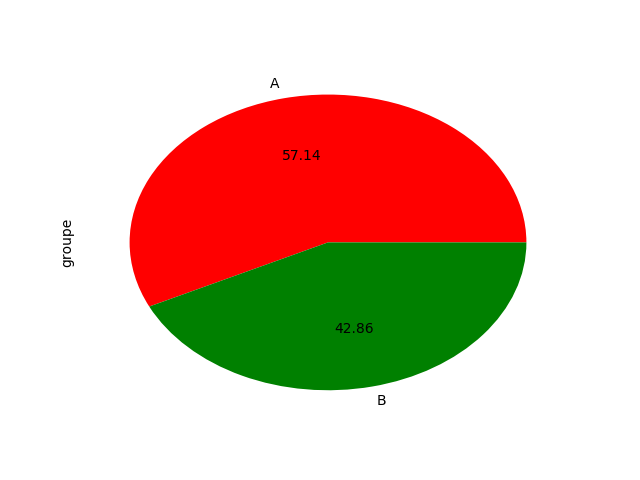

In [36]:
df.groupe.value_counts(normalize=True).plot.pie(labels=['A', 'B'], colors= ['r', 'g'], autopct='%.2f')

using the plot function of matplotlib:

<IPython.core.display.Javascript object>


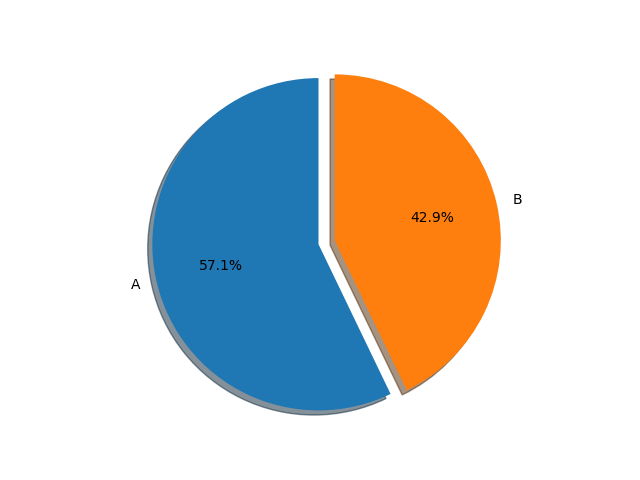

In [41]:
val = df.groupe.value_counts(normalize=True).values
explode = (0.1, 0) 
labels = "A", "B"
fig1, ax1 = plt.subplots()
ax1.pie(val, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

- Get student list who are in groupe A

In [29]:
df[df.groupe=="A"]

,nom,groupe,note1,note2
0,Bob,A,13.0,14.0
2,AA,A,7.0,15.0
3,AB,A,13.0,15.0
5,BDC,A,14.5,14.0


2    A
3    A
4    B
5    A
6    B
Name: groupe, dtype: object